In [6]:
# Завантажити та розділити датасет cifar_10 на тренувальний та тестовий набори.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
# Завантаження та розділення датасету CIFAR-10

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:

# Нормалізувати дані для швидшого та ефективнішого тренування мережі.

train_images, test_images = train_images / 255.0, test_images / 255.0

In [8]:
# Будівництво Моделі:
# Створити нейронну мережу з використанням Keras з чотирма шарами (повністю з'єднані).
# Встановити необхідну кількість вузлів на кожному шарі та використати підходящі функції активації.
# Задати функцію втрат та оптимізатор для тренування.
# Підберіть оптимальну кількість епох. Пам’ятайте про проблему перенавчвння.

model =  keras.Sequential([
 layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               393344    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1250/1250 [==========================

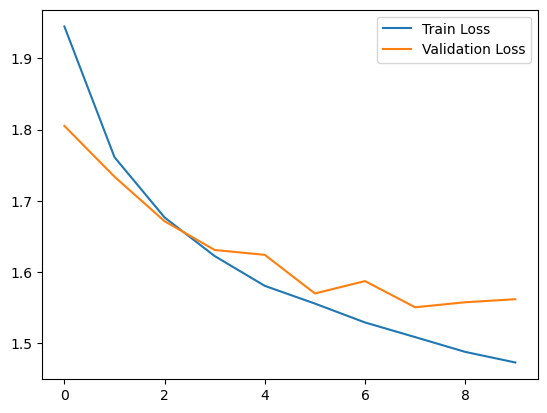

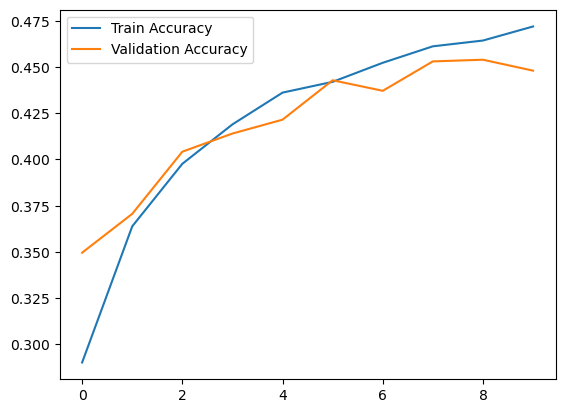

313/313 [==============================] - 3s 11ms/step - loss: 1.5312 - accuracy: 0.4545
Test accuracy: 0.4544999897480011
313/313 [==============================] - 1s 2ms/step - loss: 1.5312 - accuracy: 0.4545
Test accuracy: 0.4544999897480011


In [9]:
# Тренування Моделі:
# Запустити тренування моделі на тренувальному наборі.
# Вивести графіки функції втрат та точності відносно епох тренування.
# Оцінка Точності:
# Оцінити точність моделі на тестовому наборі.


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step


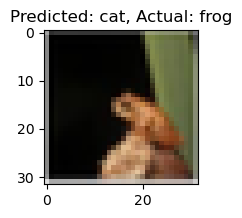

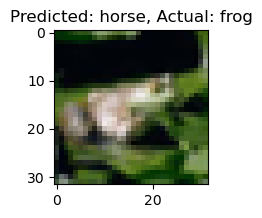

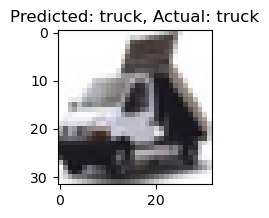

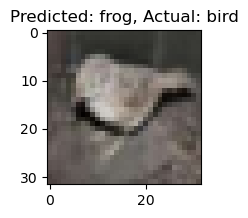

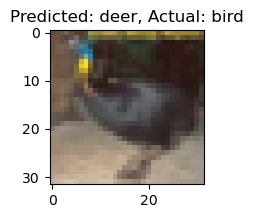

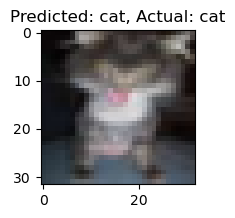

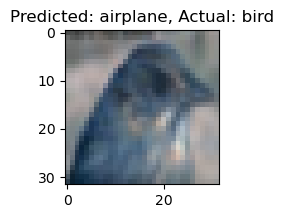

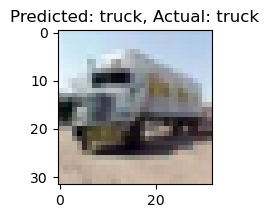

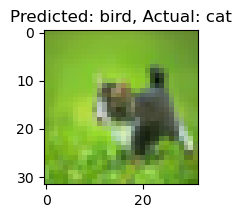

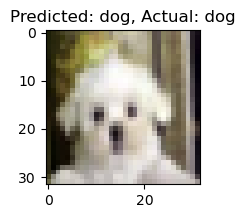


Model Evaluation:
Test Loss: 1.5312
Test Accuracy: 45.45%

Total Parameters: 404010

Layer 1: flatten_1
Number of Parameters: 0
Input Shape: (None, 32, 32, 3), Output Shape: (None, 3072)

Layer 2: dense_4
Number of Parameters: 393344
Input Shape: (None, 3072), Output Shape: (None, 128)

Layer 3: dense_5
Number of Parameters: 8256
Input Shape: (None, 128), Output Shape: (None, 64)

Layer 4: dense_6
Number of Parameters: 2080
Input Shape: (None, 64), Output Shape: (None, 32)

Layer 5: dense_7
Number of Parameters: 330
Input Shape: (None, 32), Output Shape: (None, 10)


In [10]:
# Розпізнавання Зображень:
# Вибрати 10 випадкових зображень з тестового набору та використати навчену модель для їх класифікації.
# Вивести спрогнозовані класи та порівняти їх із справжніми класами.
# Статистика
# Вивести статистику моделі

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)


random_indices = np.random.choice(test_images.shape[0], size=10, replace=False)

for i in random_indices:
    predicted_class = class_names[predicted_classes[i]]
    actual_class = class_names[int(test_labels[i])]

    # Виведення самого зображення
    plt.figure(figsize=(2, 2))
    plt.imshow(test_images[i])
    plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
    plt.show()
    
print("\nModel Evaluation:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc*100:.2f}%")

total_parameters = sum([np.prod(layer.get_weights()[i].shape) for layer in model.layers for i in range(len(layer.get_weights()))])

print(f"\nTotal Parameters: {total_parameters}")

for i, layer in enumerate(model.layers):
    print(f"\nLayer {i + 1}: {layer.name}")
    print(f"Number of Parameters: {layer.count_params()}")
    print(f"Input Shape: {layer.input_shape}, Output Shape: {layer.output_shape}")


In [ ]:
# Запропонувати можливі шляхи поліпшення результатів.

# Один з варіантів - додати згорткові шари